In [66]:
import pickle

In [67]:
with open("user_domain_edgelist.pkl", "rb") as fp:
    edgelist = pickle.load(fp)

In [68]:
edgelist[:10]

[(29108, 'academia', 15),
 (318519, 'academia', 6),
 (1201401, 'academia', 54),
 (106989, 'academia', 10),
 (219211, 'academia', 27),
 (103941, 'academia', 2),
 (141826, 'academia', 7),
 (510624, 'academia', 109),
 (511582, 'academia', 6),
 (298433, 'academia', 36)]

In [130]:
BipartiteGraph = nx.Graph()
BipartiteGraph.add_weighted_edges_from(edgelist)
#nx.set_node_attributes(BipartiteGraph, bp_attrs)

nx.is_bipartite(BipartiteGraph)

True

In [123]:
nx.is_bipartite(BipartiteGraph)

True

In [69]:
BipartiteGraphNodes = []
for edgetuple in edgelist:
    if edgetuple[1] not in BipartiteGraphNodes:
        BipartiteGraphNodes.append(edgetuple[1])

In [70]:
BipartiteGraphNodes

['academia',
 'buddhism',
 'chemistry',
 'chinese',
 'cs',
 'cseducators',
 'datascience',
 'economics',
 'electronics',
 'french',
 'gamedev',
 'hermeneutics',
 'hinduism',
 'islam',
 'linguistics',
 'matheducators',
 'music',
 'or',
 'physics',
 'quant',
 'robotics',
 'russian',
 'scicomp',
 'spanish',
 'stats',
 'tor']

In [128]:
import networkx as nx
from networkx.algorithms import bipartite

#DomainDomain_ProjectionGraph

# Creating adjacency list of the bipartite graph 
(This Adjacency List a list of tuples, were first element of the tuple is a node, say n1, and 2nd element of the tuple is a dictionary which maps all the nodes that n1 is connected to, to the weights with which they are connected)

In [73]:
BipartiteGraph_AdjList = [(n, nbrdict) for n, nbrdict in BipartiteGraph.adjacency()]

In [74]:
BipartiteGraph_AdjList[0]

(29108,
 {'academia': {'weight': 15},
  'chemistry': {'weight': 3},
  'cs': {'weight': 1},
  'electronics': {'weight': 10},
  'music': {'weight': 1},
  'physics': {'weight': 29},
  'scicomp': {'weight': 11}})

In [78]:
BipartiteGraph_AdjList[1]

('academia',
 {29108: {'weight': 15},
  318519: {'weight': 6},
  1201401: {'weight': 54},
  106989: {'weight': 10},
  219211: {'weight': 27},
  103941: {'weight': 2},
  141826: {'weight': 7},
  510624: {'weight': 109},
  511582: {'weight': 6},
  298433: {'weight': 36},
  128048: {'weight': 5},
  7936: {'weight': 2},
  158216: {'weight': 1},
  507882: {'weight': 79},
  257639: {'weight': 1},
  397710: {'weight': 6},
  926968: {'weight': 38},
  31909: {'weight': 3},
  459207: {'weight': 39},
  56350: {'weight': 356},
  1003615: {'weight': 68},
  56131: {'weight': 12},
  170967: {'weight': 3},
  1103952: {'weight': 1753},
  413336: {'weight': 243},
  506817: {'weight': 181},
  74035: {'weight': 55},
  505472: {'weight': 84},
  3998: {'weight': 4},
  953694: {'weight': 2},
  127155: {'weight': 2},
  406076: {'weight': 502},
  46214: {'weight': 17},
  339125: {'weight': 203},
  1010103: {'weight': 3},
  30483: {'weight': 1},
  405245: {'weight': 13},
  465049: {'weight': 650},
  130400: {'w

In [79]:
len(BipartiteGraph_AdjList)

89861

# Creating Hashmap and Inverse Hashmap

In [75]:
hashed_edgelist = []
hashmap = {}
inverse_hashmap = {}
i = 0
for edgetuple in edgelist:
    if edgetuple[0] not in hashmap:
        hashmap[edgetuple[0]] = i
        inverse_hashmap[i] = edgetuple[0]
        i+=1
    if edgetuple[1] not in hashmap:
        hashmap[edgetuple[1]] = i
        inverse_hashmap[i] = edgetuple[1]
        i+=1
        
#print(hashmap)

In [26]:
hashmap[edgelist[0][0]]  ## edgelist[0][0] = 29108

0

In [27]:
hashmap[edgelist[0][1]]  ## edgelist[0][1] = "academia"

1

In [46]:
hashmap['academia']

1

In [28]:
hashmap[edgelist[1][0]]  ## edgelist[1][0] = 318519

2

In [29]:
hashmap[edgelist[1][1]]  ## edgelist[0][2] = "academia"

1

In [38]:
BipartiteGraph_AdjList[hashmap[edgelist[0][1]]][1].keys() ## All the users edgelist[0][1] i.e 'academia' is connected to

dict_keys([29108, 318519, 1201401, 106989, 219211, 103941, 141826, 510624, 511582, 298433, 128048, 7936, 158216, 507882, 257639, 397710, 926968, 31909, 459207, 56350, 1003615, 56131, 170967, 1103952, 413336, 506817, 74035, 505472, 3998, 953694, 127155, 406076, 46214, 339125, 1010103, 30483, 405245, 465049, 130400, 510141, 4521361, 470379, 501919, 292477, 152144, 273436, 13549, 307976, 60581, 278712, 1246828, 465573, 128012, 208980, 78178, 144312, 1070010, 252036, 90154, 390363, 44900, 1117904, 178276, 432704, 141090, 470945, 913686, 65026, 85747, 514307, 315381, 509934, 513943, 1142161, 57288, 466096, 5049, 183606, 80211, 429171, 41665, 344457, 1053898, 1156817, 68240, 513706, 1252097, 20514, 18290, 250981, 241887, 1279610, 1475, 143307, 333594, 1156302, 114972, 301392, 1224647, 1189911, 514281, 910943, 146350, 1328091, 67441, 133273, 224504, 12877, 232525, 128006, 188507, 148070, 135449, 395234, 180055, 1158758, 58413, 1050726, 267541, 1196822, 1143860, 1356073, 510571, 350536, 502062

In [13]:
type(list(BipartiteGraph_AdjList[hashmap['buddhism']][1].keys())[1])

int

In [14]:
BipartiteGraph_AdjList[1][1][29108]['weight']

15

# Building the domain-domain projection network

In [76]:
DomainsList = []
for eachtuple in edgelist :
    if eachtuple[1] not in DomainsList:
        DomainsList.append(eachtuple[1])

In [77]:
DomainsList

['academia',
 'buddhism',
 'chemistry',
 'chinese',
 'cs',
 'cseducators',
 'datascience',
 'economics',
 'electronics',
 'french',
 'gamedev',
 'hermeneutics',
 'hinduism',
 'islam',
 'linguistics',
 'matheducators',
 'music',
 'or',
 'physics',
 'quant',
 'robotics',
 'russian',
 'scicomp',
 'spanish',
 'stats',
 'tor']

In [78]:
ProjectionNetwork = nx.Graph()

In [79]:
ProjectionNetwork.add_nodes_from(DomainsList)

In [80]:
#BipartiteGraph.add_weighted_edges_from(edgelist) edgelist is a list of edgetuples
for i in range(len(DomainsList)-1):
    print(DomainsList[i])
    for j in range(i+1,len(DomainsList)):
        #print(DomainsList[j])
        Domain1 = DomainsList[i]
        Domain2 = DomainsList[j]
        hashedDomain1 = hashmap[Domain1]
        #print(hashedDomain1)
        hashedDomain2 = hashmap[Domain2]
        #print(hashedDomain2)
        #We want to calculate the edgeweight between Domain1 and Domain2 in the projection Network
        
        
        #Find the list of common neighbours between Domain1 and Domain2
        Dict1_of_Neighbours = BipartiteGraph_AdjList[hashedDomain1][1]
        Dict2_of_Neighbours = BipartiteGraph_AdjList[hashedDomain2][1]
        List1 = list(Dict1_of_Neighbours.keys())
        List2 = list(Dict2_of_Neighbours.keys())
        List_of_Common_Neighbours = list(set(List1) & set(List2))
        
        #Each common user contributes something to the total edgeweight between Domain1 and Domain2
        #We find how important each commonuser is to domain1 and to domain2 and multiply the normalised importance
        #to get the contribution to total edgeweight between Domain1 and Domain2 by each commonuser.
        edgeweight = 0
        for commonUser in List_of_Common_Neighbours:
            importance1 = BipartiteGraph_AdjList[hashedDomain1][1][commonUser]['weight']
            importance2 = BipartiteGraph_AdjList[hashedDomain2][1][commonUser]['weight']
            
            sum1 = 0
            for users in List1:
                sum1 += BipartiteGraph_AdjList[hashedDomain1][1][users]['weight']
            sum2 = 0
            for users in List2:
                sum2 += BipartiteGraph_AdjList[hashedDomain2][1][users]['weight']
                
            normalised_importance1 = importance1/sum1
            normalised_importance2 = importance2/sum2
            
            edgeweight += normalised_importance1*normalised_importance1
            
        if edgeweight !=0:
            ProjectionNetwork.add_edge(Domain1, Domain2, weight=edgeweight)

academia
buddhism
chemistry
chinese
cs
cseducators
datascience
economics
electronics
french
gamedev
hermeneutics
hinduism
islam
linguistics
matheducators
music
or
physics
quant
robotics
russian
scicomp
spanish
stats


Started 7:30 PM
Ended 

In [81]:
# dump to gml
nx.write_gml(ProjectionNetwork, "DomainDomainProjection.gml")

In [82]:
edges = ProjectionNetwork.edges()
pos = nx.spring_layout(ProjectionNetwork)

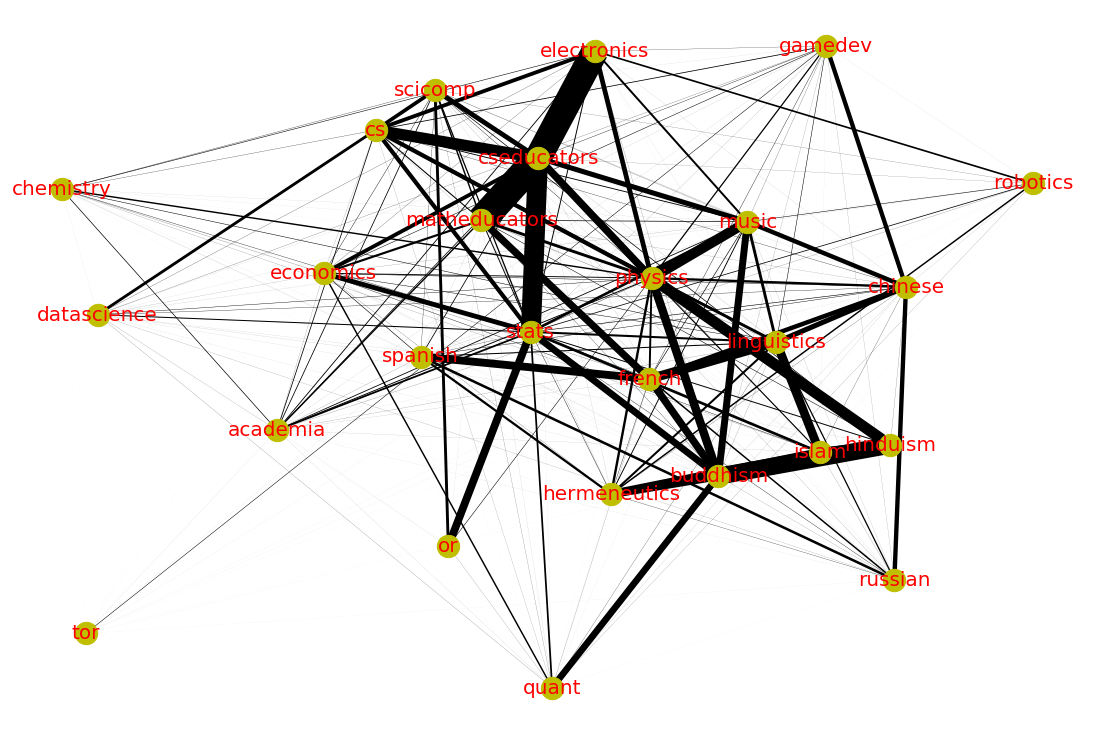

In [274]:
import matplotlib.pyplot as plt

weights = [ProjectionNetwork[u][v]['weight']*800 for u,v in edges]

plt.figure(figsize=(15,10))
nx.draw(ProjectionNetwork, edges=edges, width=weights, with_labels = True, node_size = 500, node_color = 'y', font_color = 'r', font_size = 20)
plt.savefig('DomainDomainProjection_Users.png')
plt.show()

# Running LOUVAIN Community Detection Algorithm

In [56]:
import community
import networkx as nx
import matplotlib.pyplot as plt

In [61]:
from community import community_louvain
partition = community_louvain.best_partition(ProjectionNetwork, resolution = 1)

In [62]:
ProjectionNetwork["academia"]

AtlasView({'buddhism': {'weight': 7.98976358482061e-06}, 'chemistry': {'weight': 0.0008714950169952082}, 'chinese': {'weight': 3.337861925293763e-05}, 'cs': {'weight': 0.0009678157608728971}, 'cseducators': {'weight': 0.0009155025909400538}, 'datascience': {'weight': 0.0001295208337777845}, 'economics': {'weight': 0.00014404894738806985}, 'electronics': {'weight': 0.001083338407117482}, 'french': {'weight': 7.820258014923835e-05}, 'gamedev': {'weight': 6.051118827317626e-05}, 'hermeneutics': {'weight': 1.781542465737479e-05}, 'hinduism': {'weight': 3.911190628985281e-06}, 'islam': {'weight': 6.986053515558224e-05}, 'linguistics': {'weight': 0.00015393724413050258}, 'matheducators': {'weight': 0.001768159134003227}, 'music': {'weight': 0.0010198670641633372}, 'or': {'weight': 3.8711674975545416e-05}, 'physics': {'weight': 0.0011867576833111664}, 'quant': {'weight': 5.534038370672237e-05}, 'robotics': {'weight': 0.00017993706298531385}, 'russian': {'weight': 3.467238201607449e-05}, 'scic

In [63]:
partition

{'academia': 0,
 'buddhism': 1,
 'chemistry': 1,
 'chinese': 2,
 'cs': 0,
 'cseducators': 0,
 'datascience': 0,
 'economics': 0,
 'electronics': 0,
 'french': 2,
 'gamedev': 2,
 'hermeneutics': 1,
 'hinduism': 1,
 'islam': 1,
 'linguistics': 2,
 'matheducators': 0,
 'music': 1,
 'or': 0,
 'physics': 1,
 'quant': 1,
 'robotics': 1,
 'russian': 2,
 'scicomp': 0,
 'spanish': 2,
 'stats': 0,
 'tor': 2}

In [64]:
community_louvain.modularity(partition, ProjectionNetwork, weight='weight')

0.33429713771803476

# Nothing really worked after this!

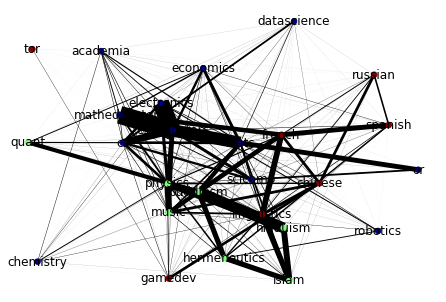

In [211]:
values = list(partition.values())

nx.draw_spring(ProjectionNetwork, width=weights, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)

In [205]:
color = []
for i in ProjectionNetwork.nodes():
    color.append(partition[i])

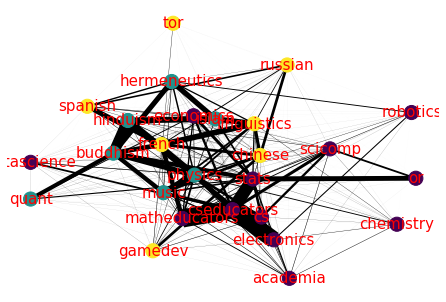

<Figure size 1080x720 with 0 Axes>

In [206]:
nx.draw(ProjectionNetwork, pos=nx.spring_layout(ProjectionNetwork), width=weights, node_color = color, with_labels = True, node_size = 200, font_color = 'r', font_size = 15)
plt.figure(figsize=(15,10))
#nx.draw(ProjectionNetwork, node_color = color, with_labels = True)
plt.savefig("DomainDomain_Louvain.png")
plt.show()

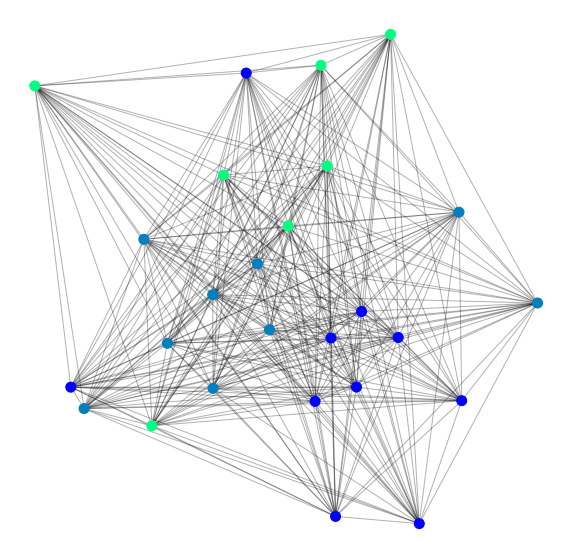

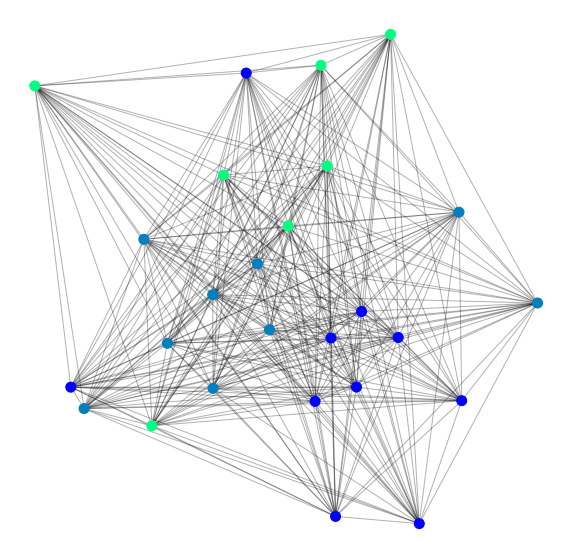

In [188]:
pos = nx.spring_layout(ProjectionNetwork)  # compute graph layout
plt.figure(figsize=(10, 10))  # image is 8 x 8 inches
plt.axis('off')
nodes = nx.draw_networkx_nodes(ProjectionNetwork, pos, node_size=100, cmap=plt.cm.winter, node_color=list(partition.values()), with_labels = True)
nx.draw_networkx_edges(ProjectionNetwork, pos, alpha=0.3, with_labels = True)
plt.show(G)

# Partition using Jaccard Coefficient

In [84]:
from networkx.algorithms import bipartite

In [91]:
Jaccardbased_Projection = bipartite.overlap_weighted_projected_graph(BipartiteGraph, BipartiteGraphNodes)

In [116]:
Jaccardbased_Projection.nodes()

NodeView(('academia', 'buddhism', 'chemistry', 'chinese', 'cs', 'cseducators', 'datascience', 'economics', 'electronics', 'french', 'gamedev', 'hermeneutics', 'hinduism', 'islam', 'linguistics', 'matheducators', 'music', 'or', 'physics', 'quant', 'robotics', 'russian', 'scicomp', 'spanish', 'stats', 'tor'))

In [117]:
nx.is_bipartite(BipartiteGraph)

True

In [93]:
print(Jaccardbased_Projection.edges(data=True))

[('academia', 'chinese', {'weight': 0.017545339519190215}), ('academia', 'stats', {'weight': 0.09814506763755061}), ('academia', 'buddhism', {'weight': 0.010594574847017993}), ('academia', 'french', {'weight': 0.023051409618573798}), ('academia', 'tor', {'weight': 0.00743801652892562}), ('academia', 'cs', {'weight': 0.07263102170460561}), ('academia', 'quant', {'weight': 0.022984258369669646}), ('academia', 'chemistry', {'weight': 0.0538728323699422}), ('academia', 'gamedev', {'weight': 0.034959349593495934}), ('academia', 'economics', {'weight': 0.040192672141503474}), ('academia', 'datascience', {'weight': 0.03784115644360105}), ('academia', 'robotics', {'weight': 0.018207282913165267}), ('academia', 'spanish', {'weight': 0.014784713816358291}), ('academia', 'matheducators', {'weight': 0.04580568935744797}), ('academia', 'electronics', {'weight': 0.05482812105471991}), ('academia', 'physics', {'weight': 0.08494746955093439}), ('academia', 'hinduism', {'weight': 0.006616514094081392})

In [94]:
from community import community_louvain

Jacpartition = community_louvain.best_partition(Jaccardbased_Projection, resolution = 1)

In [95]:
Jacpartition

{'academia': 0,
 'buddhism': 1,
 'chemistry': 0,
 'chinese': 1,
 'cs': 0,
 'cseducators': 1,
 'datascience': 2,
 'economics': 2,
 'electronics': 0,
 'french': 1,
 'gamedev': 0,
 'hermeneutics': 1,
 'hinduism': 1,
 'islam': 1,
 'linguistics': 1,
 'matheducators': 1,
 'music': 1,
 'or': 1,
 'physics': 0,
 'quant': 2,
 'robotics': 0,
 'russian': 1,
 'scicomp': 0,
 'spanish': 1,
 'stats': 2,
 'tor': 1}

In [96]:
community_louvain.modularity(Jacpartition, Jaccardbased_Projection, weight='weight')

0.15593968257647176

## Degree Distribution of Domain-Domain Network

In [65]:
## Degree Distribution of Domain-Domain Network to check for heterogeneous degree distribution

In [131]:
ProjectionNetwork.degree()

DegreeView({'academia': 25, 'buddhism': 25, 'chemistry': 25, 'chinese': 25, 'cs': 25, 'cseducators': 25, 'datascience': 25, 'economics': 25, 'electronics': 25, 'french': 25, 'gamedev': 25, 'hermeneutics': 25, 'hinduism': 24, 'islam': 25, 'linguistics': 25, 'matheducators': 25, 'music': 25, 'or': 24, 'physics': 25, 'quant': 25, 'robotics': 25, 'russian': 25, 'scicomp': 25, 'spanish': 25, 'stats': 25, 'tor': 25})

In [67]:
ProjectionNetwork.degree(weight = 'weight')

DegreeView({'academia': 0.0122343207119597, 'buddhism': 0.07873695192190507, 'chemistry': 0.005734579804702282, 'chinese': 0.03509762442783094, 'cs': 0.04416592638192195, 'cseducators': 0.13865629236719432, 'datascience': 0.007459541828570868, 'economics': 0.021449362562631965, 'electronics': 0.05319587364955658, 'french': 0.052548349585532284, 'gamedev': 0.012104227629350348, 'hermeneutics': 0.034061184501107275, 'hinduism': 0.05007432547088759, 'islam': 0.04023867818318626, 'linguistics': 0.04804376348067149, 'matheducators': 0.06059084042815631, 'music': 0.048906930385440146, 'or': 0.014261710553074671, 'physics': 0.08239301351735767, 'quant': 0.01376895902550873, 'robotics': 0.006425528100072832, 'russian': 0.013868935961894082, 'scicomp': 0.022332758926326947, 'spanish': 0.020677352214467908, 'stats': 0.07879260084683697, 'tor': 0.0008470846639311849})

In [108]:
mylist = list(ProjectionNetwork.edges(data=True))
mylist

[('academia', 'buddhism', {'weight': 7.98976358482061e-06}),
 ('academia', 'chemistry', {'weight': 0.0008714950169952082}),
 ('academia', 'chinese', {'weight': 3.337861925293763e-05}),
 ('academia', 'cs', {'weight': 0.0009678157608728971}),
 ('academia', 'cseducators', {'weight': 0.0009155025909400538}),
 ('academia', 'datascience', {'weight': 0.0001295208337777845}),
 ('academia', 'economics', {'weight': 0.00014404894738806985}),
 ('academia', 'electronics', {'weight': 0.001083338407117482}),
 ('academia', 'french', {'weight': 7.820258014923835e-05}),
 ('academia', 'gamedev', {'weight': 6.051118827317626e-05}),
 ('academia', 'hermeneutics', {'weight': 1.781542465737479e-05}),
 ('academia', 'hinduism', {'weight': 3.911190628985281e-06}),
 ('academia', 'islam', {'weight': 6.986053515558224e-05}),
 ('academia', 'linguistics', {'weight': 0.00015393724413050258}),
 ('academia', 'matheducators', {'weight': 0.001768159134003227}),
 ('academia', 'music', {'weight': 0.0010198670641633372}),
 (

In [110]:
sumweight = 0
i = 0
while i < 25:
    sumweight+=mylist[i][2]['weight']
    i+=1

In [111]:
sumweight

0.0122343207119597

In [133]:
weightededges = list(ProjectionNetwork.degree(weight = 'weight'))
weightededges

[('academia', 0.0122343207119597),
 ('buddhism', 0.07873695192190507),
 ('chemistry', 0.005734579804702282),
 ('chinese', 0.03509762442783094),
 ('cs', 0.04416592638192195),
 ('cseducators', 0.13865629236719432),
 ('datascience', 0.007459541828570868),
 ('economics', 0.021449362562631965),
 ('electronics', 0.05319587364955658),
 ('french', 0.052548349585532284),
 ('gamedev', 0.012104227629350348),
 ('hermeneutics', 0.034061184501107275),
 ('hinduism', 0.05007432547088759),
 ('islam', 0.04023867818318626),
 ('linguistics', 0.04804376348067149),
 ('matheducators', 0.06059084042815631),
 ('music', 0.048906930385440146),
 ('or', 0.014261710553074671),
 ('physics', 0.08239301351735767),
 ('quant', 0.01376895902550873),
 ('robotics', 0.006425528100072832),
 ('russian', 0.013868935961894082),
 ('scicomp', 0.022332758926326947),
 ('spanish', 0.020677352214467908),
 ('stats', 0.07879260084683697),
 ('tor', 0.0008470846639311849)]

In [134]:
weightededges.sort(key = lambda x: x[1])

In [135]:
weightededges

[('tor', 0.0008470846639311849),
 ('chemistry', 0.005734579804702282),
 ('robotics', 0.006425528100072832),
 ('datascience', 0.007459541828570868),
 ('gamedev', 0.012104227629350348),
 ('academia', 0.0122343207119597),
 ('quant', 0.01376895902550873),
 ('russian', 0.013868935961894082),
 ('or', 0.014261710553074671),
 ('spanish', 0.020677352214467908),
 ('economics', 0.021449362562631965),
 ('scicomp', 0.022332758926326947),
 ('hermeneutics', 0.034061184501107275),
 ('chinese', 0.03509762442783094),
 ('islam', 0.04023867818318626),
 ('cs', 0.04416592638192195),
 ('linguistics', 0.04804376348067149),
 ('music', 0.048906930385440146),
 ('hinduism', 0.05007432547088759),
 ('french', 0.052548349585532284),
 ('electronics', 0.05319587364955658),
 ('matheducators', 0.06059084042815631),
 ('buddhism', 0.07873695192190507),
 ('stats', 0.07879260084683697),
 ('physics', 0.08239301351735767),
 ('cseducators', 0.13865629236719432)]

In [136]:
x = []
y = []
labels = []
for eachtuple in weightededges:
    x.append(eachtuple[0])
    labels.append(eachtuple[0])
    y.append(eachtuple[1])

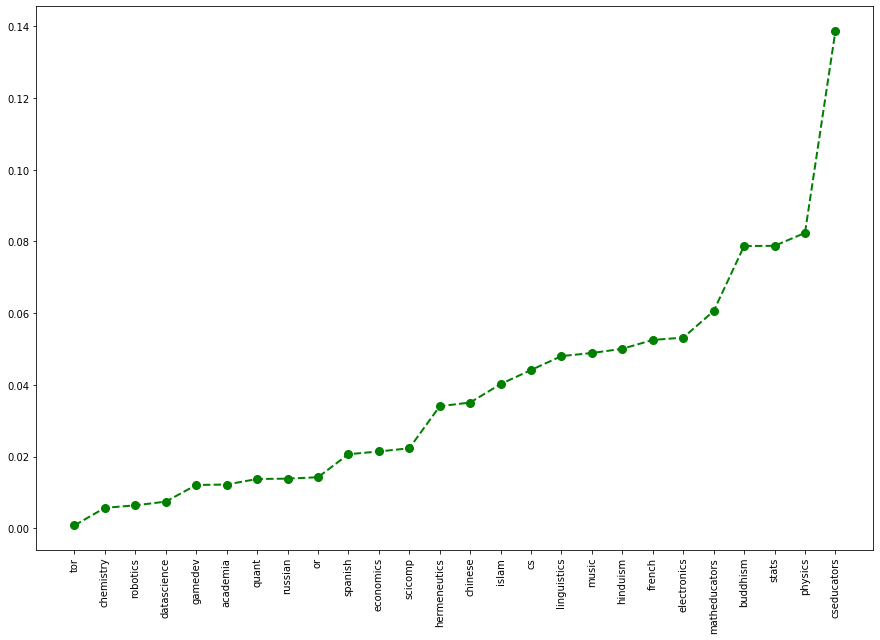

<Figure size 432x288 with 0 Axes>

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
#plt.plot(x,y) #'bo', markersize = 4, linewidth=2)
plt.plot(x, y, 'go--', linewidth=2, markersize=8)
plt.xticks(x, labels, rotation='vertical')
plt.show()
plt.savefig('DegreeDistribution.png')

# Trying some SBM stuff

In [1]:
import graph_tool.all as gt

In [2]:
g = gt.load_graph("DomainDomainProjection.gml")

In [3]:
print(g)

<Graph object, undirected, with 26 vertices and 324 edges at 0x14b587390>


In [4]:
state= gt.minimize_blockmodel_dl(g)


In [5]:
state

<BlockState object with 1 blocks (1 nonempty), degree-corrected, for graph <Graph object, undirected, with 26 vertices and 324 edges at 0x14b587390>, at 0x14dc78bd0>

In [6]:
state.get_B()

1

In [7]:
state.draw(vertex_shape=state.get_blocks(), output="polbooks_blocks_mdl.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14b587390, at 0x14dc971d0>

In [8]:
set(list(state.get_blocks().get_array()))

{0}

In [9]:
state.get_bpclabel().get_array()

PropertyArray([0], dtype=int32)

<Figure size 432x288 with 0 Axes>

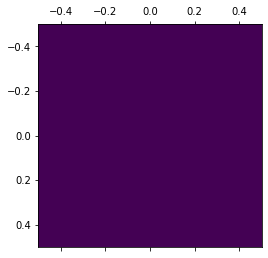

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
m = state.get_matrix()
plt.figure()
plt.matshow(m.todense())

In [11]:
state_M = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)


In [47]:
state_M

<NestedBlockState object, with base <BlockState object with 1 blocks (1 nonempty), degree-corrected, for graph <Graph object, undirected, with 26 vertices and 324 edges at 0x10d37b990>, at 0x152c517d0>, and 2 levels of sizes [(26, 1), (1, 1)] at 0x10d361c10>

## Fitting Domain-Domain Projection network to Weighted Nested SBM

In [143]:
g = gt.load_graph("DomainDomainProjection.gml")

In [144]:
g

<Graph object, undirected, with 26 vertices and 324 edges at 0x1550142d0>

In [164]:
state = gt.minimize_nested_blockmodel_dl(g, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [165]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="WeightedNestedSBM_DomainProjection_wrtUsers.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1550142d0, at 0x153866e10>,
 <Graph object, directed, with 35 vertices and 34 edges at 0x15d18b3d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d18b3d0, at 0x14e0dfe90>)

In [ ]:
#state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=1, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.inferno, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="WeightedSBM_DomainProjection_wrtUsers.svg")

<Figure size 432x288 with 0 Axes>

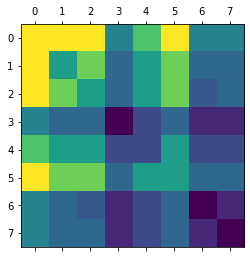

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
m = state.levels[0].get_matrix()
plt.figure()
plt.matshow(m.todense())

In [43]:
m.todense()

matrix([[20., 20., 20., 10., 15., 20., 10., 10.],
        [20., 12., 16.,  8., 12., 16.,  8.,  8.],
        [20., 16., 12.,  8., 12., 16.,  7.,  8.],
        [10.,  8.,  8.,  2.,  6.,  8.,  4.,  4.],
        [15., 12., 12.,  6.,  6., 12.,  6.,  6.],
        [20., 16., 16.,  8., 12., 12.,  8.,  8.],
        [10.,  8.,  7.,  4.,  6.,  8.,  2.,  4.],
        [10.,  8.,  8.,  4.,  6.,  8.,  4.,  2.]])

## Fitting Domain-Domain Projection network to UnWeighted Nested SBM

In [113]:
g

<Graph object, undirected, with 26 vertices and 324 edges at 0x152c6bc50>

In [114]:
state = gt.minimize_nested_blockmodel_dl(g)

In [115]:
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(vertex_text=vprop_label,edge_gradient=[], output="UNWEIGHTEDSBM_DomainProjection_wrtUsers.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x152c6bc50, at 0x15b99cbd0>,
 <Graph object, directed, with 27 vertices and 26 edges at 0x15080b550>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15080b550, at 0x15b99ce90>)

## Fitting Jaccard based Domain-Domain Projection network to Weighted Nested SBM


In [97]:
Jaccardbased_Projection

In [98]:
nx.write_gml(Jaccardbased_Projection, "JaccardBased_DomainDomainProjection.gml")

In [99]:
Jaccard_G = gt.load_graph("JaccardBased_DomainDomainProjection.gml")

In [105]:
Jaccard_G

<Graph object, undirected, with 26 vertices and 324 edges at 0x15d12a150>

In [106]:
Jaccard_state = gt.minimize_nested_blockmodel_dl(Jaccard_G, state_args=dict(recs=[Jaccard_G.ep.weight], rec_types=["real-exponential"]))

In [107]:
import matplotlib
vprop_label = Jaccard_G.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

Jaccard_state.draw(edge_color=gt.prop_to_size(Jaccard_G.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=Jaccard_G.ep.weight, edge_pen_width=gt.prop_to_size(Jaccard_G.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="JaccardBased_WeightedSBM_DomainProjection_wrtUsers.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d12a150, at 0x15d157c10>,
 <Graph object, directed, with 29 vertices and 28 edges at 0x15d18b450>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d18b450, at 0x15d18b0d0>)

In [108]:
# Now degree corrected one

In [113]:
Jaccard_state_deg = gt.minimize_nested_blockmodel_dl(Jaccard_G, deg_corr = True, state_args=dict(recs=[Jaccard_G.ep.weight], rec_types=["real-exponential"]))

In [115]:
import matplotlib
vprop_label = Jaccard_G.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

Jaccard_state_deg.draw(edge_color=gt.prop_to_size(Jaccard_G.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=Jaccard_G.ep.weight, edge_pen_width=gt.prop_to_size(Jaccard_G.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="JaccardBased_DEGCORRWeightedSBM_DomainProjection_wrtUsers.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d12a150, at 0x15ced9f10>,
 <Graph object, directed, with 29 vertices and 28 edges at 0x15d1d29d0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d1d29d0, at 0x155014150>)

## Fitting Domain-Domain Projection network to Weighted Non-Nested SBM

In [118]:
g = gt.load_graph("DomainDomainProjection.gml")

In [119]:
g

<Graph object, undirected, with 26 vertices and 324 edges at 0x15d18b090>

In [138]:
state = gt.minimize_blockmodel_dl(g, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [139]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=0.5, log=False), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="Weighted_NonNestedSBM_DomainProjection_wrtUsers.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d18b090, at 0x15ced9990>

# Comparison between Degree Corrected and Non degree corrected by comparing minimum description length

In [171]:
# we will have nested, weighted and our metric fixed

# 1. Non degree corrected

In [169]:
g

<Graph object, undirected, with 26 vertices and 324 edges at 0x1550142d0>

In [225]:
state_dc = gt.minimize_nested_blockmodel_dl(g, deg_corr=False,state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [ ]:
# entropy( ) - Calculates the entropy (a.k.a. negative log-likelihood) associated with the current block partition.

In [287]:
Sum_state_NDCEntropy = 0
for i in range(50):
    print(i)
    state_ndc =  gt.minimize_nested_blockmodel_dl(g, deg_corr=False,state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))
    Sum_state_NDCEntropy += state_ndc.entropy()
avg_ndc = Sum_state_NDCEntropy/50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [288]:
print("Non-degree-corrected DL:\t", avg_ndc)

Non-degree-corrected DL:	 -1852.8624391930746


# 2. Degree corrected

In [282]:
state_dc = gt.minimize_nested_blockmodel_dl(g, deg_corr=True, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [289]:
Sum_state_DCEntropy = 0
for i in range(50):
    print(i)
    state_dc =  gt.minimize_nested_blockmodel_dl(g, deg_corr=True,state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))
    Sum_state_DCEntropy += state_dc.entropy()
avg_dc = Sum_state_DCEntropy/50

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [292]:
print("Degree-corrected DL:\t", avg_dc)

Degree-corrected DL:	 -1831.72175968576


# Statistical significance

In [328]:
print(u"ln \u039b: ", avg_ndc - avg_dc)

ln Λ:  -21.140679507314644


# The precise threshold that should be used to decide when to reject a hypothesis is subjective and context-dependent, but the value above implies that the non-degree-corrected fit is around e^21 ≈ 10^9 times more likely than the degree corrected one, and hence it can be safely concluded that it provides a substantially better fit.

# Hence, performing "non degree corrected" Weighted Nested SBM on DomainDomain Projection w.r.t USERS

In [329]:
g = gt.load_graph("DomainDomainProjection.gml")

In [330]:
g

<Graph object, undirected, with 26 vertices and 324 edges at 0x15d1863d0>

In [344]:
state = gt.minimize_nested_blockmodel_dl(g, deg_corr = False, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"]))

In [345]:
import matplotlib
vprop_label = g.new_vertex_property("string")
for i in range(len(BipartiteGraphNodes)):
    vprop_label[i] = BipartiteGraphNodes[i]

vprops = {'labels' : vprop_label}

state.draw(edge_color=g.ep.weight, vertex_text=vprop_label, ecmap=(matplotlib.cm.Blues, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="NonDegCorrWeightedNestedSBM_DomainProjection_wrtUsers.svg")

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x15d1863d0, at 0x154f79290>,
 <Graph object, directed, with 36 vertices and 35 edges at 0x15e41b850>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x15e41b850, at 0x15d1577d0>)

In [341]:
# state.draw(edge_color=gt.prop_to_size(g.ep.weight, power=0.5, log=True), vertex_text=vprop_label, ecmap=(matplotlib.cm.plasma, .6), eorder=g.ep.weight, edge_pen_width=gt.prop_to_size(g.ep.weight, 1, 4, power=1, log=True),edge_gradient=[], output="DegCorrWeightedNestedSBM_DomainProjection_wrtUsers.svg")

# Sampling from the posterior distribution using mcmc equilibrate

In [324]:
g = gt.load_graph("DomainDomainProjection.gml")

state = gt.minimize_nested_blockmodel_dl(g, deg_corr = True, state_args=dict(recs=[g.ep.weight], rec_types=["real-exponential"])) # Initialize he Markov
                                            # chain from the "ground
                                            # state"

# Before doing model averaging, the need to create a NestedBlockState
# by passing sampling = True.

# We also want to increase the maximum hierarchy depth to L = 10

# We can do both of the above by copying.

bs = state.get_bs()                     # Get hierarchical partition.
bs += [np.zeros(1)] * (10 - len(bs))    # Augment it to L = 10 with
                                        # single-group levels.

state = state.copy(bs=bs, sampling=True)

# Now we run 1000 sweeps of the MCMC

dS, nattempts, nmoves = state.mcmc_sweep(niter=100)

print("Change in description length:", dS)
print("Number of accepted vertex moves:", nmoves)

Change in description length: -714.2528754886487
Number of accepted vertex moves: 1959


In [327]:
# We will first equilibrate the Markov chain
gt.mcmc_equilibrate(state, wait=100, mcmc_args=dict(niter=10))

pv = [None] * len(state.get_levels())

def collect_marginals(s):
    global pv
    pv = [sl.collect_vertex_marginals(pv[l]) for l, sl in enumerate(s.get_levels())]

# Now we collect the marginals for exactly 100,000 sweeps
gt.mcmc_equilibrate(state, force_niter=1000, mcmc_args=dict(niter=10), callback=collect_marginals)

# Now the node marginals for all levels are stored in property map
# list pv. We can visualize the first level as pie charts on the nodes:
state_0 = state.get_levels()[0]
state_0.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv[0], edge_gradient=None, output="lesmis-nested-sbm-marginals.svg")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1622cc690, at 0x15e43f710>

In [346]:
## Problem with pos=g.vp.pos